<a href="https://colab.research.google.com/github/aagamaar/ML/blob/main/Handling_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Methods to handle missing values:

1. Imputation

2. Dropping



Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Downloading the dataset from kaggle using Kaggle API

In [14]:
#!/bin/bash
! kaggle datasets download ankulsharma150/netflix-data-analysis

Dataset URL: https://www.kaggle.com/datasets/ankulsharma150/netflix-data-analysis
License(s): other
  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 358MB/s]


Extracting the zip file

In [15]:
from zipfile import ZipFile
dataset = '/content/netflix-data-analysis.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


Loading the dataset to a Pandas DataFrame

In [16]:
dataset = pd.read_csv('/content/netflix_movies (1).csv')

In [17]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


NaN refers to Not a Number

8807 rows and 12 columns

In [18]:
dataset.shape

(8807, 12)

To count the number of missing values

In [20]:
dataset.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Central Tendencies:

1. Mean

2. Mode

3. Median

It is a good practice to impute values rather than just dropping them.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


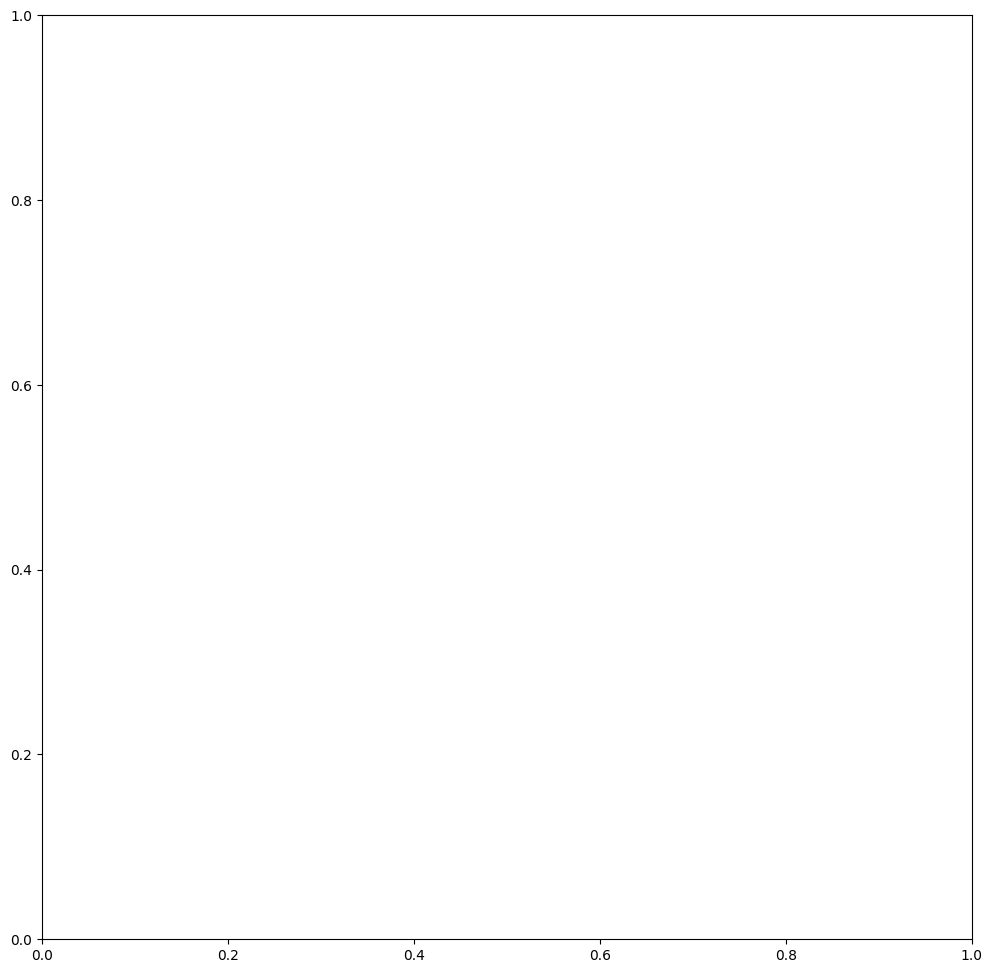

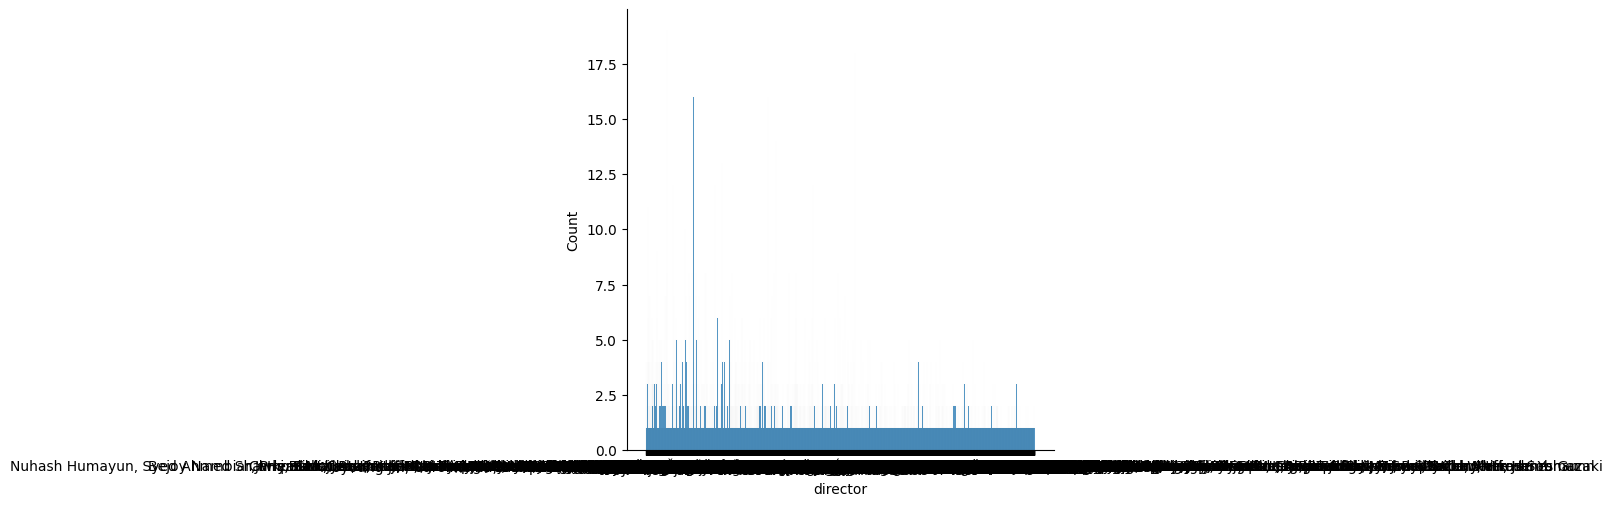

In [31]:
# analyse the distribution of data in the director

fig, ax = plt.subplots(figsize=(12,12))
sns.displot(dataset.director)

#Imputation Method

If the column I was playing with was Salary or something numerically , then I could have imputed the values like this:

##Filling the missing values with Mean value:

dataset['Salary'].fillna(dataset['salary'].mean(),inplace=True)

##Filling the missing values with Median value:

dataset['Salary'].fillna(dataset['salary'].median(),inplace=True)

##Filling the missing values with Mode value:

dataset['Salary'].fillna(dataset['salary'].mode(),inplace=True)


#Dropping Method

In [32]:
rating_dataset = pd.read_csv('/content/netflix_movies (1).csv')

In [33]:
rating_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Dropping the missing values

In [34]:
rating_dataset = rating_dataset.dropna(how='any')

In [35]:
rating_dataset.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [36]:
rating_dataset.shape

(5332, 12)